In [2]:
from closure_funcs import *
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import matplotlib.colors as mcolors
from scipy.stats import linregress, gaussian_kde
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
import math

In [3]:
d = pd.read_csv('../tables/merged_final_non_org.csv', parse_dates=['Time_Mid'])
#data = d.dropna(subset=['Longitude', 'Latitude', 'k_obs'])

In [4]:
#d = d[(d['Org_Ave_IsoK_STP']>=0) & (d['SO4_Ave_IsoK_STP']>=0) & (d['NO3_Ave_IsoK_STP']>=0) & (d['NH4_Ave_IsoK_STP']>=0) & (d['Chl_Ave_IsoK_STP']>=0)]

In [5]:
'''
ams_keys = ['Org_Ave_IsoK_STP', 'SO4_Ave_IsoK_STP', 'NO3_Ave_IsoK_STP', 'NH4_Ave_IsoK_STP', 'Chl_Ave_IsoK_STP']
for i in range(0,5):
    d.loc[d[ams_keys[i]]<0,ams_keys[i]] = 0
d['ams_tot'] = d.loc[:,['Org_Ave_IsoK_STP', 'SO4_Ave_IsoK_STP', 'NO3_Ave_IsoK_STP', 'NH4_Ave_IsoK_STP', 'Chl_Ave_IsoK_STP']].sum(axis=1)
'''

"\nams_keys = ['Org_Ave_IsoK_STP', 'SO4_Ave_IsoK_STP', 'NO3_Ave_IsoK_STP', 'NH4_Ave_IsoK_STP', 'Chl_Ave_IsoK_STP']\nfor i in range(0,5):\n    d.loc[d[ams_keys[i]]<0,ams_keys[i]] = 0\nd['ams_tot'] = d.loc[:,['Org_Ave_IsoK_STP', 'SO4_Ave_IsoK_STP', 'NO3_Ave_IsoK_STP', 'NH4_Ave_IsoK_STP', 'Chl_Ave_IsoK_STP']].sum(axis=1)\n"

In [6]:
d['OMF'] = d['Org_Ave_IsoK_STP']/d['ams_tot']

<Figure size 1000x600 with 0 Axes>

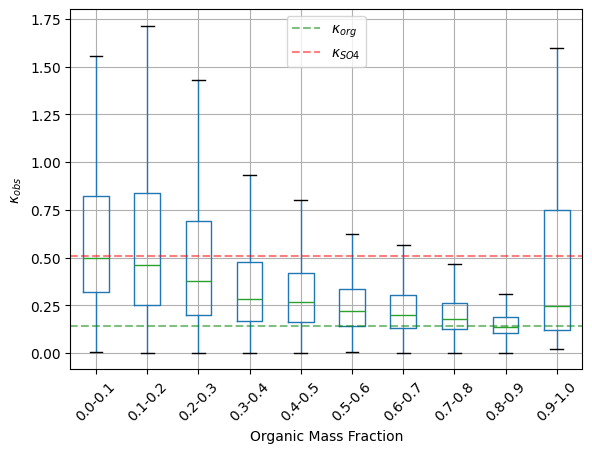

In [7]:
# Assuming 'd' is your DataFrame containing 'CO_ppm' and 'k_obs' columns
# Define CO_ppm ranges (bins) - adjust as needed
#d_sub = sub_m2[sub_m2['CCN_SS']==0.37]
d_sub = d
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
labels = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
plt.show()
# Bin 'CO_ppm' values
d_sub['OMF_range'] = pd.cut(d_sub['OMF'], bins=bins, labels=labels, right=False)

# Plot boxplot of 'k_obs' for each CO_ppm range
plt.figure(figsize=(10, 6))
d_sub.boxplot(column='k_obs', by='OMF_range', grid=True, showfliers=False)
plt.title('')
plt.axhline(.14, c='green', ls='--', alpha=.5, label=r'$\kappa _{org}$')
plt.axhline(.507, c='red', ls='--', alpha=.5, label=r'$\kappa _{SO4}$')
plt.legend()
plt.suptitle('')  # Removes the automatic boxplot subtitle
plt.xlabel('Organic Mass Fraction')
plt.ylabel(r'$\kappa _{obs}$')
plt.xticks(rotation=45)
#plt.ylim([0, 0.15])
plt.savefig('../figures/k_obs_v_OMF.png', dpi=300, bbox_inches='tight')
plt.show()

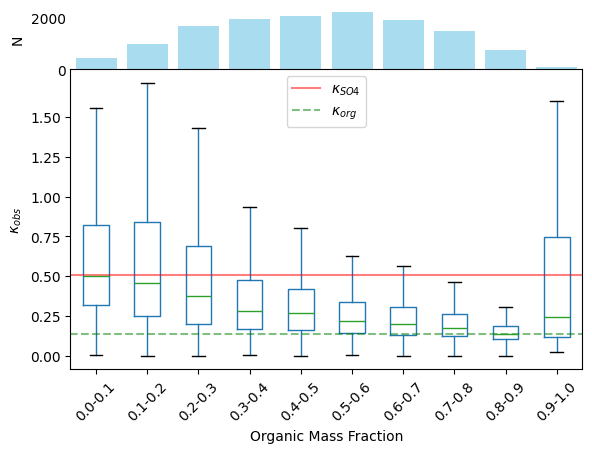

In [8]:
# Define the OMF bins and labels
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
labels = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
d_sub = d.copy()

# Bin 'OMF' values
d_sub['OMF_range'] = pd.cut(d_sub['OMF'], bins=bins, labels=labels, right=False)

# Create figure and gridspec layout for distribution on top and boxplot below
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 5]}, sharex=True)

# Count the number of points in each 'OMF_range' bin
counts = d_sub['OMF_range'].value_counts().reindex(labels).fillna(0)  # Ensure the correct order and fill missing bins with 0

# Plot the counts as a bar chart on the top subplot
ax[0].bar(np.linspace(1,10,10), counts.values, color='skyblue', alpha=0.7)
ax[0].set_ylabel('N')
ax[0].grid(True, axis='y')

# Plot boxplot of 'k_obs' for each OMF_range on the bottom subplot
d_sub.boxplot(column='k_obs', by='OMF_range', grid=False, showfliers=False, ax=ax[1])
ax[1].axhline(.507, color='red', linestyle='-', alpha=.5, label=r'$\kappa _{SO4}$')
ax[1].axhline(.14, color='green', linestyle='--', alpha=.5, label=r'$\kappa _{org}$')
ax[1].legend()
ax[1].set_xlabel('Organic Mass Fraction')
ax[1].set_ylabel(r'$\kappa _{obs}$')
ax[1].set_xticklabels(labels, rotation=45)
plt.subplots_adjust(hspace=0)
# Adjust plot and save
plt.suptitle('')  # Remove automatic title
ax[1].set_title('')
ax[1].set_yticks([0,.25,.5,.75,1,1.25,1.5])
for spine in ax[0].spines.values():
    spine.set_visible(False)
ax[0].grid(False)
ax[0].tick_params(axis='both', which='both', length=0)
#plt.tight_layout()
plt.savefig('../figures/k_obs_v_OMF_with_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

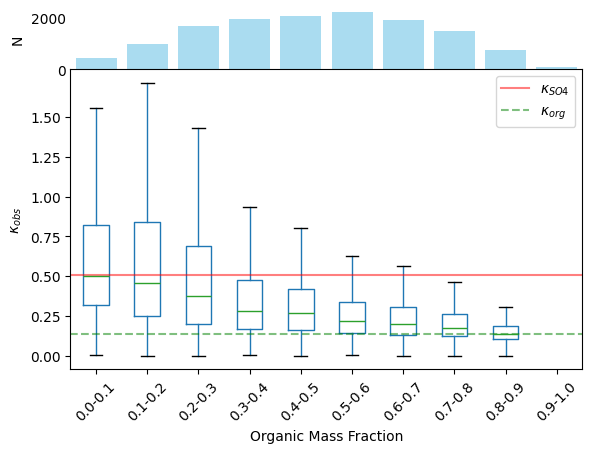

In [9]:
# Define the OMF bins and labels
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
labels = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
d_sub = d.copy()

# Bin 'OMF' values
d_sub['OMF_range'] = pd.cut(d_sub['OMF'], bins=bins, labels=labels, right=False)

# Create figure and gridspec layout for distribution on top and boxplot below
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 5]}, sharex=True)

# Count the number of points in each 'OMF_range' bin
counts = d_sub['OMF_range'].value_counts().reindex(labels).fillna(0)  # Ensure the correct order and fill missing bins with 0

for l in range(0,len(counts)):
    if counts.iloc[l]< 75:
        d_sub.loc[d_sub['OMF_range']==counts.index[l],'k_obs'] = np.nan

# Plot the counts as a bar chart on the top subplot
ax[0].bar(np.linspace(1,10,10), counts.values, color='skyblue', alpha=0.7)
ax[0].set_ylabel('N')
ax[0].grid(True, axis='y')

# Plot boxplot of 'k_obs' for each OMF_range on the bottom subplot
d_sub.boxplot(column='k_obs', by='OMF_range', grid=False, showfliers=False, ax=ax[1])
ax[1].axhline(.507, color='red', linestyle='-', alpha=.5, label=r'$\kappa _{SO4}$')
ax[1].axhline(.14, color='green', linestyle='--', alpha=.5, label=r'$\kappa _{org}$')
ax[1].legend()
ax[1].set_xlabel('Organic Mass Fraction')
ax[1].set_ylabel(r'$\kappa _{obs}$')
ax[1].set_xticklabels(labels, rotation=45)
plt.subplots_adjust(hspace=0)
# Adjust plot and save
plt.suptitle('')  # Remove automatic title
ax[1].set_title('')
ax[1].set_yticks([0,.25,.5,.75,1,1.25,1.5])
for spine in ax[0].spines.values():
    spine.set_visible(False)
ax[0].grid(False)
ax[0].tick_params(axis='both', which='both', length=0)
#plt.tight_layout()
plt.savefig('../figures/k_obs_v_OMF_with_distribution_thresh.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
rem_k = ['Takeoff/Landing', 'Transit', 'Descent', 'Ascent', 'Other', 'Slant/Spiral', 'Remote Sensing (HSRL-2)']

In [11]:
for i in range(0,len(rem_k)):
    d.loc[d['leg']==rem_k[i], 'leg'] = np.nan

In [12]:
df_winter = d[d['Time_Mid'].dt.month.isin([11, 12, 1, 2, 3, 4])]
df_spring = d[d['Time_Mid'].dt.month.isin([5, 6]) & (np.logical_not((d['Time_Mid'].dt.month.isin([6])) & (d['Time_Mid'].dt.year.isin([2022]))))]
df_summer = d[d['Time_Mid'].dt.month.isin([8, 9])]
df_bermuda = d[(d['Time_Mid'].dt.month.isin([6])) & (d['Time_Mid'].dt.year.isin([2022]))]

In [13]:
d_seg = [df_winter, df_spring, df_summer, df_bermuda]

In [49]:
(df_summer['CCN_n_pred']/df_summer['N_CCN_stdPT']).describe()

count    524.000000
mean       2.132708
std        3.831920
min        0.090101
25%        0.903524
50%        1.033346
75%        1.282122
max       40.201725
dtype: float64

In [50]:
(df_bermuda['CCN_n_pred']/df_bermuda['N_CCN_stdPT']).describe()

count    2023.000000
mean        1.008379
std         0.813749
min         0.102621
25%         0.690460
50%         0.812361
75%         1.031648
max        12.639807
dtype: float64

In [14]:
count = 0
for i in range(0,len(d_seg)):
    count += len(d_seg[i])

In [15]:
df_winter['leg'].unique()

array([nan, 'BCB', 'ACB', 'MinAlt', 'ACT', 'BCT', 'ABL', 'BBL'],
      dtype=object)

In [16]:
for i in range(0,4):
    d_seg[i]

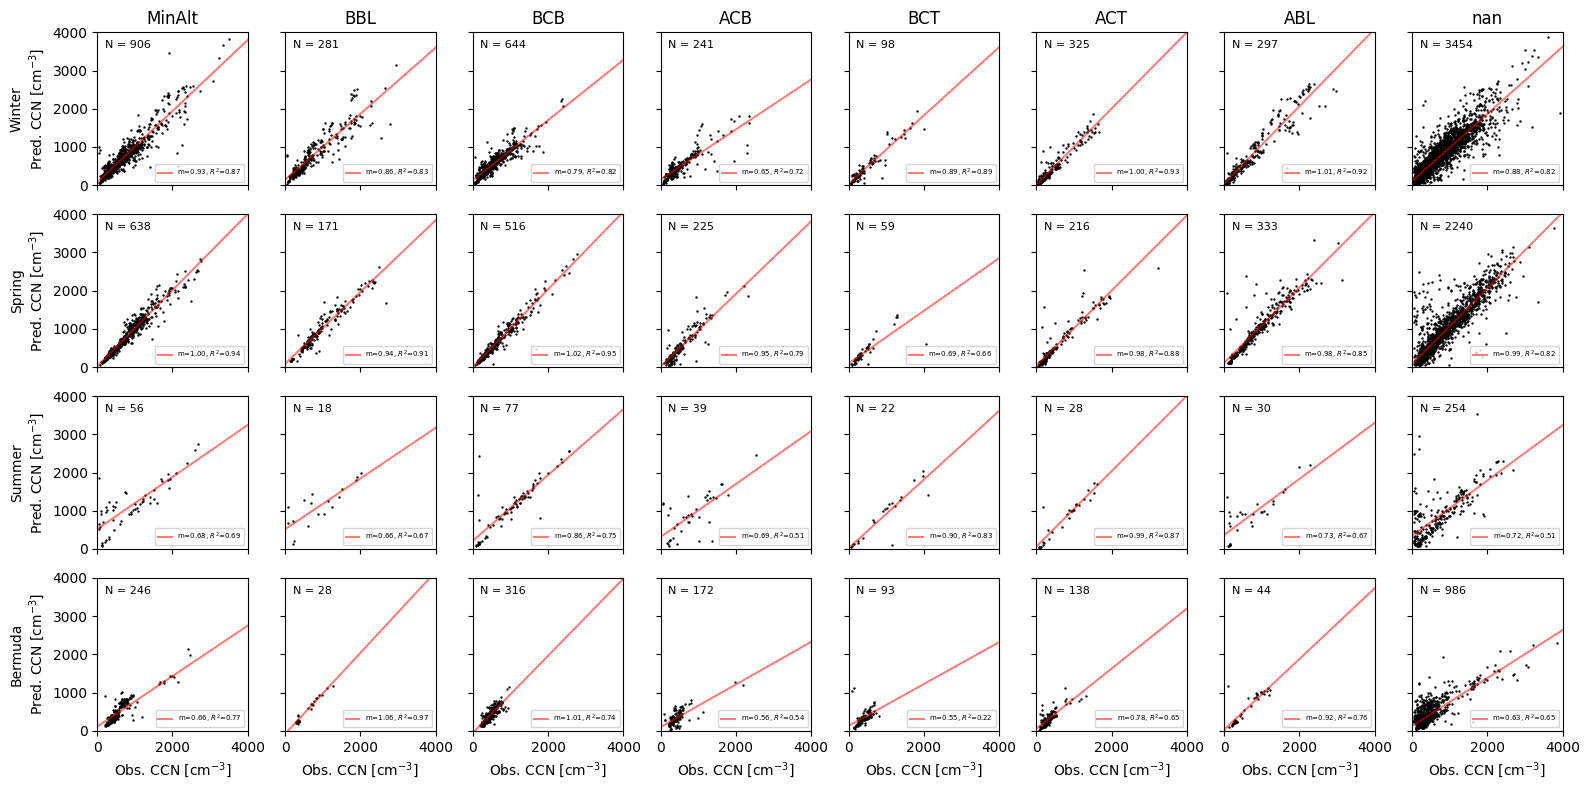

In [17]:
fig,axes = plt.subplots(4,8,figsize=(16, 8),sharex='all', sharey='all')
save_k = ['MinAlt','BBL','BCB','ACB','BCT', 'ACT','ABL',np.nan]

ax_min,ax_max = [0,4000]
j = 0 # range 0 - 7
k = 0 # range 0 - 4
for i, ax in enumerate(axes.flatten()):
    d_i = d_seg[k].loc[d_seg[k]['leg']==save_k[j]]
    if pd.isna(save_k[j]):
        d_i = d_seg[k].loc[pd.isna(d_seg[k]['leg'])]

    d_i = d_i.dropna(subset=['N_CCN_stdPT', 'CCN_n_pred'])
    ax.scatter(d_i['N_CCN_stdPT'], d_i['CCN_n_pred'], s=0.5, c='black')

    
    slope, intercept, r_value, p_value, std_err = linregress(d_i['N_CCN_stdPT'], d_i['CCN_n_pred'])
    # Calculate the line of best fit
    fit_line = slope * np.linspace(ax_min,ax_max) + intercept
    ax.plot(np.linspace(ax_min,ax_max), fit_line, c='r', label=f'm={slope:.2f}, $R^2$={r_value**2:.2f}', alpha=.5)
    ax.legend(fontsize=5, loc='lower right')
    mask = ~np.isnan(d_i['N_CCN_stdPT']) & ~np.isnan(d_i['CCN_n_pred'])
    num_points = np.sum(mask)
    ax.text(0.05, 0.95, f"N = {num_points}",
         fontsize=8, transform=ax.transAxes,
         verticalalignment='top', horizontalalignment='left')



    # conditions of which leg/df to select
    j+=1
    if j == 8:
        j = 0
        k += 1

axes[0,0].set_xlim([0,4000])
axes[0,0].set_ylim([0,4000])

season = ['Winter', 'Spring', 'Summer', 'Bermuda']
for i in range(0,4):
    axes[i,0].set_ylabel(season[i]+'\nPred. CCN [cm$^{-3}$]')
for i in range(0,8):
    axes[3,i].set_xlabel('Obs. CCN [cm$^{-3}$]')
for i,ax in enumerate(axes[0,:]):
    ax.set_title(str(save_k[i]))
    
plt.tight_layout()
plt.savefig('../figures/season_legs.png', dpi=300)

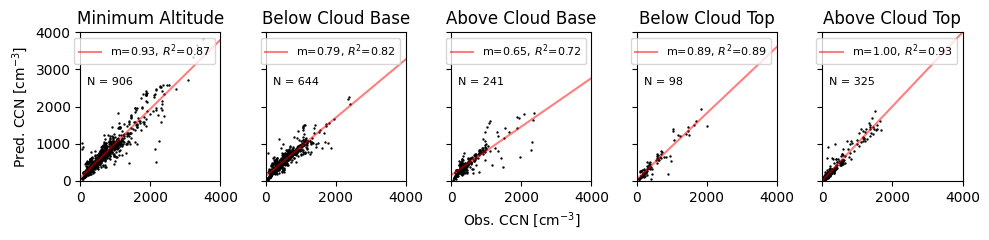

In [18]:
fig,axes = plt.subplots(1,5,figsize=(10, 2.5),sharex='all', sharey='all')
save_k = ['MinAlt','BCB','ACB','BCT', 'ACT']
save_k_l = ['Minimum Altitude','Below Cloud Base','Above Cloud Base','Below Cloud Top', 'Above Cloud Top']

ax_min,ax_max = [0,4000]
j = 0 # range 0 - 7
k = 0 # range 0 - 4
for i, ax in enumerate(axes.flatten()):
    d_i = d_seg[k].loc[d_seg[k]['leg']==save_k[j]]
    if pd.isna(save_k[j]):
        d_i = d_seg[k].loc[pd.isna(d_seg[k]['leg'])]

    d_i = d_i.dropna(subset=['N_CCN_stdPT', 'CCN_n_pred'])
    ax.scatter(d_i['N_CCN_stdPT'], d_i['CCN_n_pred'], s=0.5, c='black')

    
    slope, intercept, r_value, p_value, std_err = linregress(d_i['N_CCN_stdPT'], d_i['CCN_n_pred'])
    # Calculate the line of best fit
    fit_line = slope * np.linspace(ax_min,ax_max) + intercept
    ax.plot(np.linspace(ax_min,ax_max), fit_line, c='r', label=f'm={slope:.2f}, $R^2$={r_value**2:.2f}', alpha=.5)
    ax.legend(fontsize=8, loc='upper right')
    mask = ~np.isnan(d_i['N_CCN_stdPT']) & ~np.isnan(d_i['CCN_n_pred'])
    num_points = np.sum(mask)
    ax.text(0.05, 0.7, f"N = {num_points}",
         fontsize=8, transform=ax.transAxes,
         verticalalignment='top', horizontalalignment='left')



    # conditions of which leg/df to select
    j+=1
    if j == 8:
        j = 0
        k += 1

axes[0].set_xlim([0,4000])
axes[0].set_ylim([0,4000])
axes[0].set_ylabel('Pred. CCN [cm$^{-3}$]')
axes[2].set_xlabel('Obs. CCN [cm$^{-3}$]')
#fig.suptitle('Winter')
for i,ax in enumerate(axes):
    ax.set_title(str(save_k_l[i]))
'''
season = ['Winter', 'Spring', 'Summer', 'Bermuda']
for i in range(0,4):
    axes[i,0].set_ylabel(season[i]+'\nPred. CCN [cm$^{-3}$]')
for i in range(0,8):
    axes[3,i].set_xlabel('Obs. CCN [cm$^{-3}$]')
for i,ax in enumerate(axes[0,:]):
    ax.set_title(str(save_k[i]))
'''
plt.tight_layout()
plt.savefig('../figures/winter_legs.png', dpi=300, bbox_inches='tight')

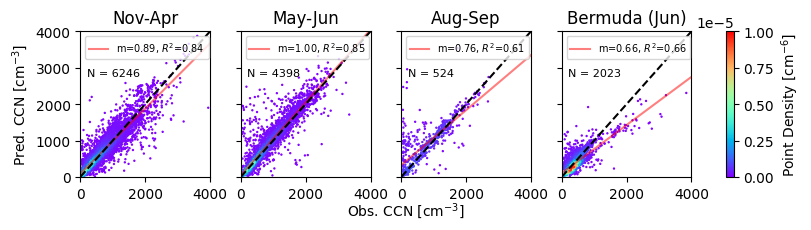

In [44]:
fig, axes = plt.subplots(1,4, figsize=(8,2), sharey=True, sharex=True, constrained_layout=True)
ax_min,ax_max = 0,4000
season2 = ['Nov-Apr', 'May-Jun', 'Aug-Sep', 'Bermuda (Jun)']
for i in range(0,4):
    ax = axes[i]
    p_d = d_seg[i].dropna(subset=['N_CCN_stdPT', 'CCN_n_pred']) # panel data


    # Calculate point density
    xy = np.vstack([p_d['N_CCN_stdPT'], p_d['CCN_n_pred']])
    z = gaussian_kde(xy)(xy)  # Density values for each point

    slope, intercept, r_value, p_value, std_err = linregress(p_d['N_CCN_stdPT'], p_d['CCN_n_pred'])

    fit_line = slope * np.linspace(ax_min,ax_max) + intercept
    ax.plot(np.linspace(ax_min,ax_max), fit_line, c='r', label=f'm={slope:.2f}, $R^2$={r_value**2:.2f}', alpha=.5, ls='-')
    ax.plot(np.linspace(ax_min,ax_max), np.linspace(ax_min,ax_max), c='black', alpha=1, ls='--')
    ax.legend(fontsize=7, loc='upper left')
    # plot data
    scatter = ax.scatter(p_d['N_CCN_stdPT'], p_d['CCN_n_pred'], s=0.5, c=z, cmap='rainbow', vmin=0, vmax=1e-5)

    ax.text(0.05, 0.75, f"N = {len(p_d['N_CCN_stdPT'])}",
         fontsize=8, transform=ax.transAxes,
         verticalalignment='top', horizontalalignment='left')

    # add labels
    ax.set_title(season2[i])
fig.colorbar(scatter, ax=ax, orientation='vertical', label='Point Density [cm$^{-6}$]', pad=-.1)
ax.set_xlim([ax_min,ax_max])
ax.set_ylim([ax_min,ax_max])
axes[0].set_ylabel('Pred. CCN [cm$^{-3}$]')
fig.text(0.5, -0.05, 'Obs. CCN [cm$^{-3}$]', ha='center')
plt.savefig('../figures/seasons_all.png', dpi=300, bbox_inches='tight')

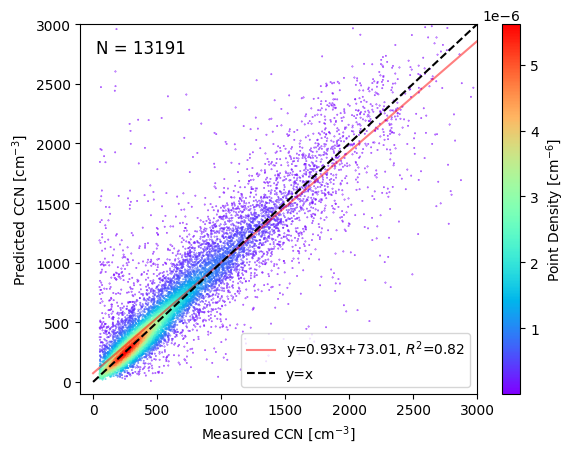

In [30]:
sub_m2 = d.dropna(subset=['N_CCN_stdPT', 'CCN_n_pred'])
# Define the data
x = sub_m2['N_CCN_stdPT']
y = sub_m2['CCN_n_pred']
mask = ~np.isnan(x) & ~np.isnan(y)
num_points = np.sum(mask)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the line of best fit
fit_line = slope * np.linspace(0, x.max()) + intercept

# Calculate point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)  # Density values for each point

# Plot the data and best fit line
plt.plot(np.linspace(0, x.max()), fit_line, c='r', label=f'y={slope:.2f}x+{intercept:.2f}, $R^2$={r_value**2:.2f}', alpha=.5)
plt.plot(np.linspace(0, x.max()), np.linspace(0, x.max()), c='black', ls='--', label='y=x')
plt.scatter(x, y, s=0.1, alpha=1, c=z, cmap='rainbow')

#plt.xlim([-100, x.max()])
#plt.ylim([-100, x.max()])
plt.xlim([-100, 3000])
plt.ylim([-100, 3000])
plt.ylabel('Predicted CCN [cm$^{-3}$]')
plt.xlabel('Measured CCN [cm$^{-3}$]')
plt.colorbar(label='Point Density [cm$^{-6}$]')

plt.text(0.15, 0.85, f"N = {num_points}",
         fontsize=12, transform=plt.gcf().transFigure,
         verticalalignment='top', horizontalalignment='left')

plt.legend(loc='lower right')
plt.savefig('../figures/closure_all_non_org_cbar.png', dpi=300, bbox_inches='tight')

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_72060/2709098911.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_72060/2709098911.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LonBin'] = np.digitize(data['Longitude'], lon_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_72060/2709098911.py:30: SettingWithCopyWarning: 
A value is trying to be set on 

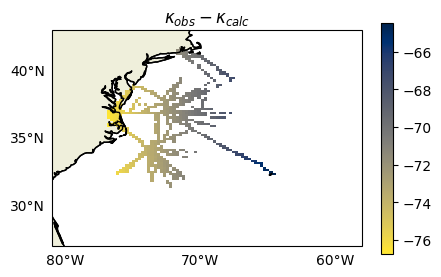

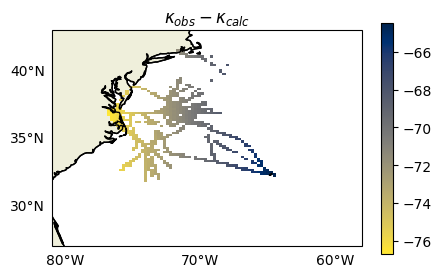

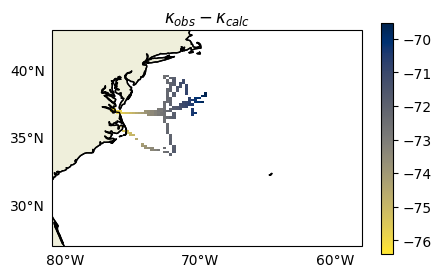

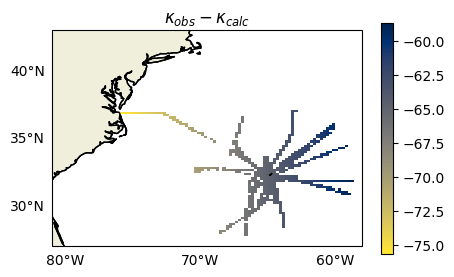

In [ ]:


# Example data loading
# data = pd.read_csv('path_to_your_1hz_data.csv')  # Assuming your data is in a CSV file
# For this example, let's create some mock data

'''
np.random.seed(0)
num_points = 10000
data = pd.DataFrame({
    'Latitude': np.random.uniform(35, 50, num_points),  # Latitudes between 35 and 50
    'Longitude': np.random.uniform(-80, -50, num_points),  # Longitudes between -80 and -50
    'Time': pd.date_range(start='2023-01-01', periods=num_points, freq='H')  # 1 Hz data over a period
})
'''
for d_1 in d_seg:

    # Set up the map projection and plot area
    fig, ax = plt.subplots(figsize=(5,3), subplot_kw={'projection': ccrs.PlateCarree()})

    plt_key = ['Longitude', 'k', 'CO_ppm']
    cmap_labels = [r'$\kappa _{obs} - \kappa _{calc}$', r'$\kappa _{calc}$', 'CO [ppm]']

    i=0
    data = d_1.dropna(subset=['Longitude', 'Latitude', plt_key[i]])

    # Define the grid resolution
    lat_bins = np.linspace(27, 43, 100)  # 50 bins from 35 to 50 degrees latitude
    lon_bins = np.linspace(-81, -58, 100)  # 60 bins from -80 to -50 degrees longitude

    # Bin the data into the grid
    data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
    data['LonBin'] = np.digitize(data['Longitude'], lon_bins)

    # Calculate the mean time for each grid cell
    grid = data.groupby(['LatBin', 'LonBin']).agg({plt_key[i]: 'median'}).reset_index()
    #grid['k_obs'] = grid['k_obs']  # Convert time to integer for plotting

    # Create a 2D array of the grid
    time_grid = np.full((len(lat_bins), len(lon_bins)), np.nan)
    time_grid[grid['LatBin'] - 1, grid['LonBin'] - 1] = grid[plt_key[i]]


    #ax=axes[i]
    ax.set_extent([-81, -58, 27, 43], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    #ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    #ax.add_feature(cfeature.OCEAN, edgecolor='black')
    #ax.add_feature(cfeature.LAKES, edgecolor='black', alpha=0.5)
    #ax.add_feature(cfeature.RIVERS)

    # Plot the heatmap
    lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
    c = ax.pcolormesh(lon_grid, lat_grid, time_grid, cmap='cividis_r', transform=ccrs.PlateCarree())
    ax.set_title(cmap_labels[i])
    # Add a colorbar
    cbar = plt.colorbar(c, ax=ax, orientation='vertical')
    #cbar.set_label(cmap_labels[i])

    # Add grid lines
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator([-80, -70, -60])  # Longitude labels every 5 degrees
    gl.ylocator = mticker.FixedLocator([30, 35, 40])  # Latitude labels every 5 degrees

    gl.xlines = False
    gl.ylines = False

    # Set title
    #ax.set_title('Northwest Atlantic Sampling Heatmap by Time')

    # Show the plot
    #plt.savefig('../figures/k_obs_map_diff.png', dpi=1000)

In [ ]:
df_spring[df_spring['OMF']>.9]

,Unnamed: 0.1,level_0,Unnamed: 0,index,Time_Mid,SMPS_Bin02,SMPS_Bin03,SMPS_Bin04,SMPS_Bin05,SMPS_Bin06,...,k_obs,D_c,CCN_n_pred,non_org,Org_vc,non_org_vc,ams_tot_vc,k,OMF,OMF_range
2616,2616,5018,8955,8955,2021-05-13 18:52:51.500,NaN,0.00,0.0,0.00,0.00,...,0.124487,89.064695,133.038100,0.004,0.001226,0.000002,0.001228,0.140675,0.996748,0.9-1.0
2682,2682,5086,9062,9062,2021-05-14 13:46:26.500,NaN,0.00,0.0,0.00,0.00,...,2.567360,87.249716,86.265385,0.073,0.001511,0.000041,0.001552,0.149751,0.953914,0.9-1.0
2855,2855,5263,9373,9373,2021-05-15 18:42:41.500,0.0,0.00,0.0,0.00,0.00,...,0.186445,86.719001,155.823084,0.043,0.000686,0.000024,0.000710,0.152552,0.941015,0.9-1.0
3050,3050,5461,9614,9614,2021-05-18 17:58:49.500,0.0,0.00,0.0,0.00,0.00,...,0.209950,87.991462,179.855068,0.031,0.001062,0.000018,0.001080,0.145954,0.971638,0.9-1.0
3491,3491,5902,10153,10153,2021-05-20 17:36:43.500,0.0,0.00,0.0,0.00,0.00,...,0.156290,86.344987,185.093611,0.121,0.001654,0.000068,0.001722,0.154566,0.931831,0.9-1.0
4267,4267,6692,11392,11392,2021-06-02 18:34:15.500,NaN,0.00,0.0,0.00,0.00,...,1.422346,86.213230,92.073303,0.058,0.000754,0.000033,0.000787,0.155285,0.928571,0.9-1.0
4556,4556,6984,11820,11820,2021-06-07 18:22:31.500,NaN,0.00,0.0,0.00,0.00,...,0.362517,86.681842,166.999827,0.102,0.001601,0.000058,0.001659,0.152751,0.940106,0.9-1.0
4557,4557,6985,11821,11821,2021-06-07 18:23:31.500,NaN,0.00,0.0,0.00,0.00,...,1.057606,85.456863,77.902715,0.211,0.002125,0.000119,0.002244,0.159494,0.909675,0.9-1.0
4560,4560,6988,11824,11824,2021-06-07 18:26:31.500,NaN,0.00,0.0,0.00,2140.57,...,0.311429,85.284015,127.058360,0.091,0.000870,0.000051,0.000921,0.160478,0.905307,0.9-1.0
4603,4603,7031,11878,11878,2021-06-07 19:36:30.500,NaN,0.00,0.0,1662.53,0.00,...,0.342123,88.999353,136.303862,0.005,0.001045,0.000003,0.001048,0.140989,0.995238,0.9-1.0


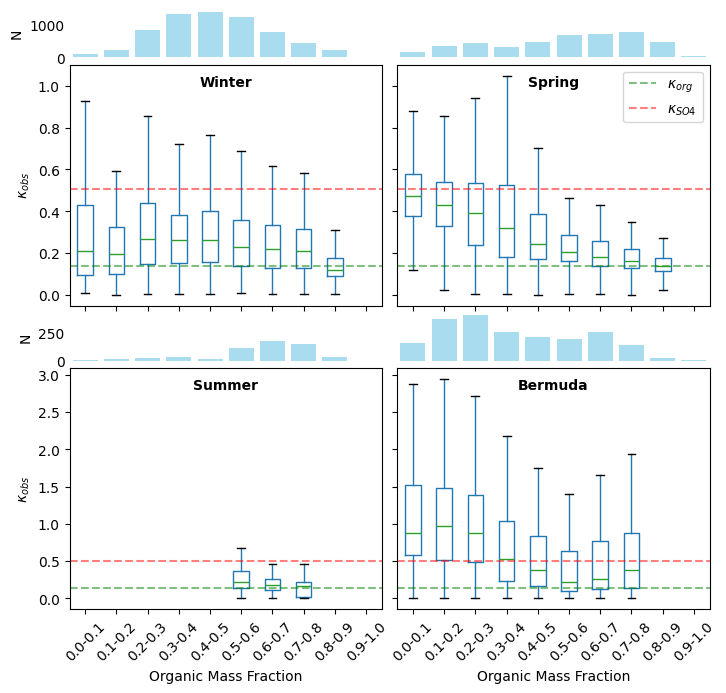

In [ ]:
# Define the OMF bins and labels
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
labels = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']

# Create figure and gridspec layout for distribution on top and boxplot below
fig, axes = plt.subplots(4, 2, figsize=(8,8), gridspec_kw={'height_ratios': [1, 5, 1, 5]}, sharex='all', sharey='row')
j = 0
k = 0
for i in range(0,4):
    if i == 1:
        j,k = 0,1
    if i == 2:
        j,k = 2,0
    if i == 3:
        j,k = 2,1

    d_sub = d_seg[i].copy()

    # Bin 'OMF' values
    d_sub['OMF_range'] = pd.cut(d_sub['OMF'], bins=bins, labels=labels, right=False)


    # Count the number of points in each 'OMF_range' bin
    counts = d_sub['OMF_range'].value_counts().reindex(labels).fillna(0)  # Ensure the correct order and fill missing bins with 0

    for l in range(0,len(counts)):
        if counts.iloc[l]< 50:
            d_sub.loc[d_sub['OMF_range']==counts.index[l],'k_obs'] = np.nan

    # Plot the counts as a bar chart on the top subplot
    #axes[j,k].set_title(season[i])
    axes[j,k].bar(np.linspace(1,10,10), counts.values, color='skyblue', alpha=0.7)
    
    axes[j,k].grid(True, axis='y')

    # Plot boxplot of 'k_obs' for each OMF_range on the bottom subplot
    d_sub.boxplot(column='k_obs', by='OMF_range', grid=False, showfliers=False, ax=axes[j+1,k])
    axes[j+1,k].axhline(.14, color='green', linestyle='--', alpha=0.5, label=r'$\kappa _{org}$')
    axes[j+1,k].axhline(.507, color='red', linestyle='--', alpha=0.5, label=r'$\kappa _{SO4}$')
    axes[j+1,k].text(0.5, .9, season[i], transform=axes[j+1,k].transAxes, ha='center', va='bottom', fontweight='bold')
    axes[j+1,k].set_xlabel('')
    if k ==0:
        axes[j,k].set_ylabel('N')
        axes[j+1,k].set_ylabel(r'$\kappa _{obs}$')
    
    plt.subplots_adjust(hspace=.05)
    plt.subplots_adjust(wspace=.05)
    # Adjust plot and save
    plt.suptitle('')  # Remove automatic title
    axes[j+1,k].set_title('')
    #axes[1,0].set_yticks([0,.25,.5,.75,1,1.25,1.5])
    for spine in axes[j,k].spines.values():
        spine.set_visible(False)
    axes[j,k].grid(False)
    axes[j,k].tick_params(axis='both', which='both', length=0)

axes[1,1].legend()
axes[3,0].set_xlabel('Organic Mass Fraction')
axes[3,1].set_xlabel('Organic Mass Fraction')
axes[3, 0].set_xticks(np.arange(1, 11))
axes[3,0].set_xticklabels(labels, rotation=45)
axes[3, 1].set_xticks(np.arange(1, 11))
axes[3,1].set_xticklabels(labels, rotation=45)
#plt.tight_layout()
plt.savefig('../figures/k_obs_v_OMF_with_distribution_season.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
counts[i].index

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_72060/540299559.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  counts[i].index


AttributeError: 'numpy.int64' object has no attribute 'index'